<center>
    <h1>MNIST For ML Beginners</h1>
    <h3>Interactive IPython Notebook</h3>
    <br/>
    Source: https://www.tensorflow.org/versions/r0.8/tutorials/mnist/beginners/index.html
</center>


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import *
from numpy import *
%matplotlib inline

Download MNIST dataset. 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<hr />

Get a batch of 50 training examples from the MNIST training set. 

In [3]:
batch = mnist.train.next_batch(50)

The MNIST dataset has thousands of 28 X 28 greyscale pixel images of alpabetical characters. They are unrolled into 784 length rows. 

In [4]:
print( batch[0][0].shape, 28 * 28 )


(784,) 784


First image in our batch of training examples alongside the one-hot vector classification/label. A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimensions.

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

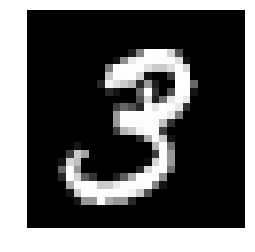

In [5]:
firstIMG = batch[0][1].reshape((28, 28))
secondIMG = batch[0][2].reshape((28, 28))

plt.axis("off")

imgplot = plt.imshow(firstIMG, cmap=cm.gray)

batch[1][1]

Second image in our batch of training examples alongside the one-hot classification vector.

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

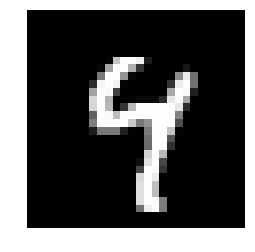

In [6]:
imgplot = plt.imshow(secondIMG , cmap=cm.gray)
plt.axis("off")
batch[1][2]

<center><h3>Softmax Regression</h3></center>

$$y = softmax(Wx+b)$$

In [7]:
import tensorflow as tf

# Clear the graph from prior sessions. A ipython quirk. 
tf.reset_default_graph()

In [8]:
with tf.name_scope('Hidden') as scope:
    x = tf.placeholder(tf.float32, [None, 784],name='input')
    W = tf.Variable(tf.zeros([784, 10]),name='weights')
    b = tf.Variable(tf.zeros([10]),name='biases')
    y = tf.nn.softmax(tf.matmul(x, W) + b, name='softmax')

<center><h3>Cross-Entropy as a Cost Function</h3></center>

<h3>$$H_{y'}(y) = - \sum_{i}y'_i  log(y_i)$$</h3>

<h3>$$H(X) = \sum_{i=1}^m p(x_i)log( \frac{1}{p(x_i)}  ) \to - \sum_{i=1}^m x_i  log(x_i)$$</h3>

Where y is our predicted probability distribution, and y′ is the true distribution (the one-hot vector we'll input). In some rough sense, the cross-entropy is measuring how inefficient our predictions are for describing the truth.

To implement cross-entropy we need to first add a new placeholder to input the correct answers:


In [9]:
y_ = tf.placeholder(tf.float32, [None, 10])

First, tf.log computes the logarithm of each element of y. Next, we multiply each element of y_ with the corresponding element of tf.log(y). Then tf.reduce_sum adds the elements in the second dimension of y, due to the reduction_indices=[1] parameter. Finally, tf.reduce_mean computes the mean over all the examples in the batch.

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In this case, we ask TensorFlow to minimize cross_entropy using the gradient descent algorithm with a learning rate of 0.5. Gradient descent is a simple procedure, where TensorFlow simply shifts each variable a little bit in the direction that reduces the cost. 

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


Now we have our model set up to train. One last thing before we launch it, we have to add an operation to initialize the variables we created:

In [20]:
init = tf.global_variables_initializer()

We can now launch the model in a Session, and run the operation that initializes the variables:

In [21]:
sess = tf.Session()
sess.run(init)

Before we train our model, let's get TensorBoard up and running. Go to your commandline and CD into the directory that contains this notebook. Activate your tensorflow virtualenv. Then issue the following console command to launch TensorBoard: 

```
tensorboard --logdir=log_beginner_minst

```

You should get something like this: 

```
Starting TensorBoard 16 on port 6006
(You can navigate to http://0.0.0.0:6006)
```

Open up a web browser and navigate to the url specified. 

Let's now visualize our graph

In [22]:
summaries_dir = "log_beginner_minst/run1/"

if tf.gfile.Exists(summaries_dir):
    tf.gfile.DeleteRecursively(summaries_dir)
    tf.gfile.MakeDirs(summaries_dir)

summary_writer = tf.summary.FileWriter(summaries_dir, sess.graph)

FailedPreconditionError: Failed to remove a directory: log_beginner_minst/run1/

Let's train -- we'll run the training step 1000 times!

In [23]:
for i in range(10000):

    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys}) 
    
    if( (i+1)*100 % 100000 == 0):
        print("Batch %i"% ( (i+1)*100) )
        #print("One example: ",batch_xs[0],batch_ys[0])


Batch 100000
Batch 200000
Batch 300000
Batch 400000
Batch 500000
Batch 600000
Batch 700000
Batch 800000
Batch 900000
Batch 1000000


tf.argmax is an extremely useful function which gives you the index of the highest entry in a tensor along some axis. For example, tf.argmax(y,1) is the label our model thinks is most likely for each input, while tf.argmax(y_,1) is the true label. We can use tf.equal to check if our prediction matches the truth.


In [24]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

correctPredictionBools = sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

print(correctPredictionBools)
print(sum(correctPredictionBools)/float(len(correctPredictionBools)) )

[ True  True  True ...,  True  True  True]
0.9196


In [17]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9249
